In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from time import sleep

In [3]:

w = [
    [0, 182, 492, 363, 277, 474, 0], # Пермь
    [182, 0, 609, 509, 0, 0, 0], # Березники
    [492, 609, 0, 0, 419, 0, 394], # Киров
    [363, 509, 0, 0, 0, 520, 0], # Екатеринбург
    [277, 0, 419, 0, 0, 342, 385], # Ижевск
    [474, 0, 0, 520, 342, 0, 524], # Уфа
    [0, 0, 394, 0, 385, 524, 0]  # Казань
]

n = len(w)

city = {0: 'Пермь', 1: 'Березники', 2: 'Киров', 3: 'Екатеринбург', 4: 'Ижевск', 5: 'Уфа', 6: 'Казань'}

col = [i for i in range(n)]

G = nx.Graph()

G.clear()

for i in col:
    G.add_node(i, name=city[i])

for i in range(n):
    for j in range(n):
        if w[i][j] >= 1:
            G.add_edge(i, j, weight=w[i][j])

# G.edges()

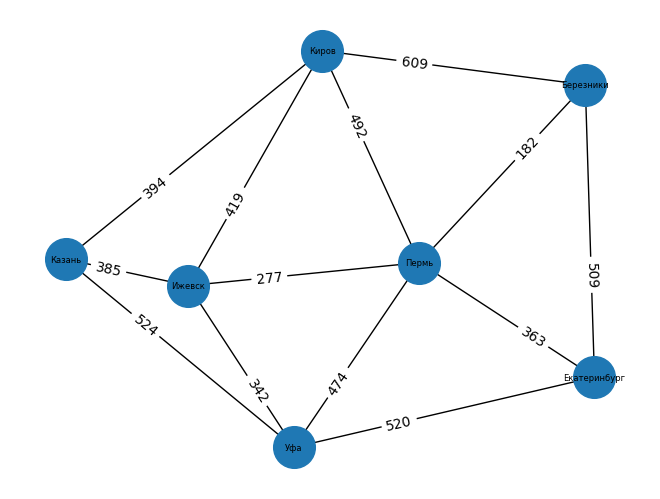

In [36]:
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, labels=city, node_size=900, font_size=6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, label_pos=0.35)
plt.show()

Пермь - Березники , Минимальное не задействованное ребро в графе 182


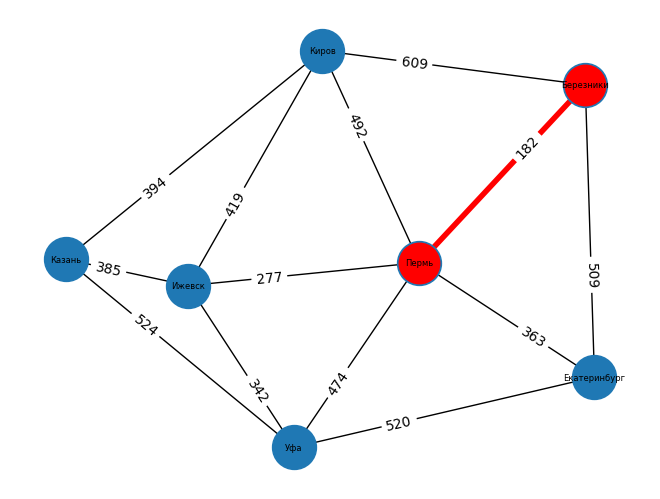

Пермь - Ижевск , Минимальное не задействованное ребро в графе 277


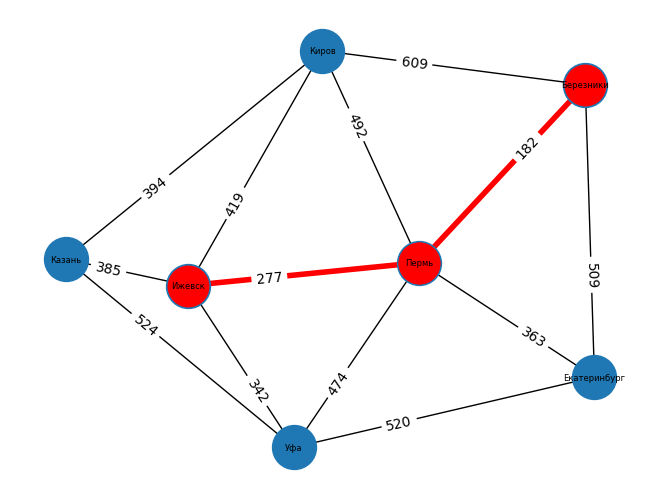

Ижевск - Уфа , Минимальное не задействованное ребро в графе 342


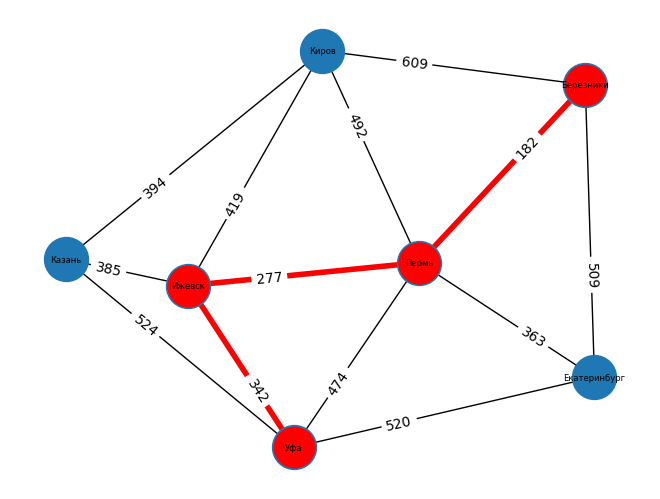

Пермь - Екатеринбург , Минимальное не задействованное ребро в графе 363


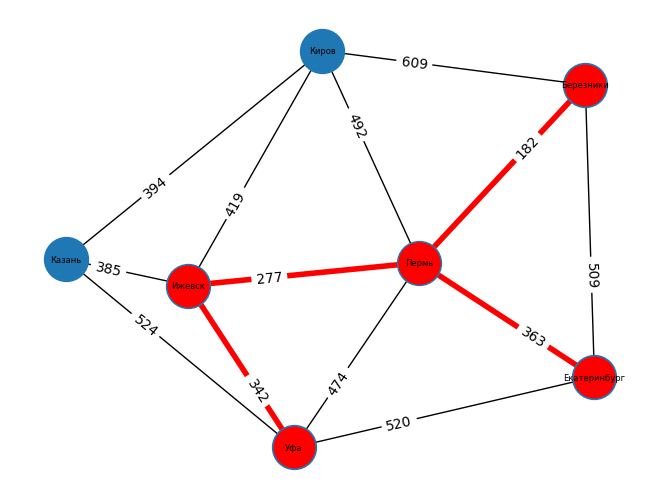

Ижевск - Казань , Минимальное не задействованное ребро в графе 385


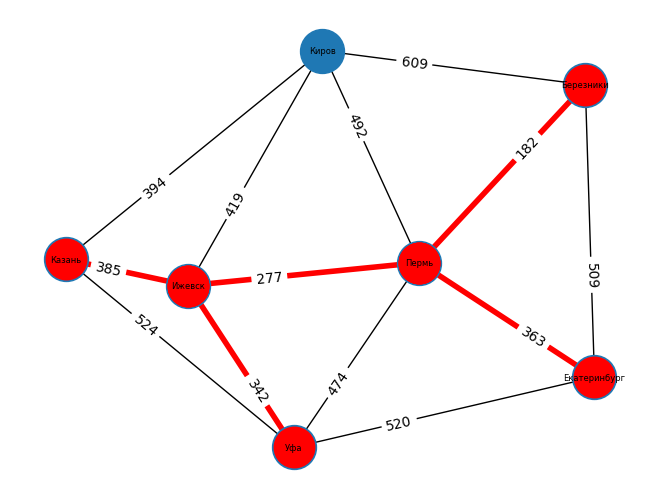

Киров - Казань , Минимальное не задействованное ребро в графе 394


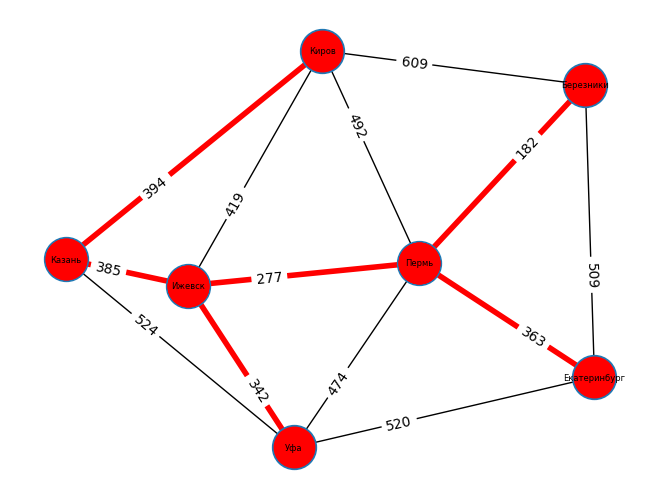

In [37]:
# алгоритм закрашивания
# Заводим список для хранения ребер с минимальными весами
ostov = []
used_nodes = []

col_copy = col.copy()

for k in range(n-1):
    minweight = 1e10
    for i in range(n):
        for j in range(n):
            if col_copy[i] != col_copy[j] and 0 < w[i][j] < minweight:
                iMin = i
                jMin = j
                minweight = w[i][j]
    ostov.append((iMin, jMin))
    used_nodes.extend([iMin])
    c = col_copy[jMin]
    
    for i in range(n):
        if col_copy[i] == c:
            col_copy[i] = col_copy[iMin]

nodes = []
edges = []

for i in ostov:
    print(city[i[0]], '-', city[i[1]], f", Минимальное не задействованное ребро в графе {nx.get_edge_attributes(G, 'weight')[i]}")
    nodes.extend(list(i))
    edges.append(i)
    nx.set_node_attributes(G, {i: 'red'}, name='color')
    nx.draw(G, pos, with_labels=True, labels=city, node_size=1000, font_size=6)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='r', node_size=850)
    nx.draw_networkx_edges(G, pos, edge_color='r',width=4, edgelist=edges)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, label_pos=0.35)
    plt.show()
